In [1]:
# ===================================
# 1. SETUP
# ===================================
# Install packages (Colab already has most, but just in case)
!pip install seaborn scikit-learn pandas matplotlib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Telco Customer Churn Prediction

## Introduction
Customer churn (when customers stop using a service) is a big challenge in subscription-based businesses.  
Goal: Predict which customers are likely to churn and identify key risk factors.


In [2]:
# ===================================
# 2. LOAD DATA
# ===================================
# Upload file from local (download from Kaggle: Telco Customer Churn dataset)
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

/tmp/ipython-input-3761512163.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
/tmp/ipython-input-3761512163.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


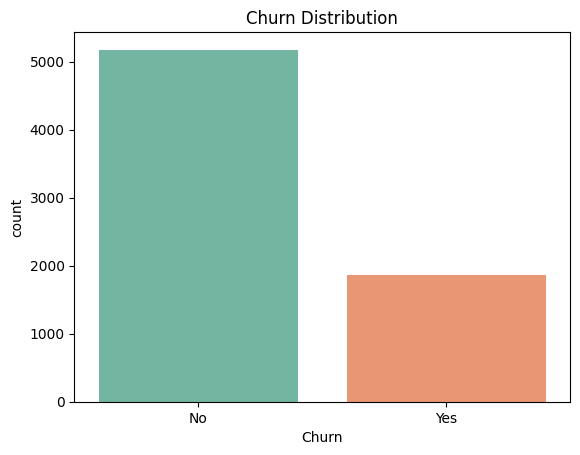

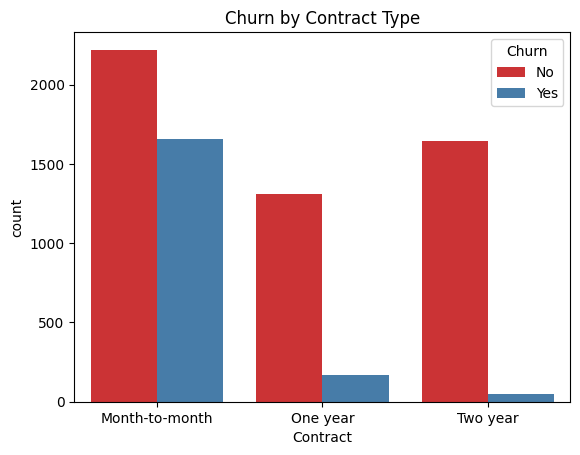

In [3]:
# ===================================
# 3. EXPLORE DATA
# ===================================
print(df.shape)
print(df.info())
print(df['Churn'].value_counts())

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Quick visualization: churn distribution
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.show()

# Churn by contract type
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title("Churn by Contract Type")
plt.show()


### Observations from EDA
- Month-to-month contracts have the highest churn.
- Customers with longer tenure churn less.
- Higher monthly charges increase churn risk.


In [6]:
# ===================================
# 4. PREPROCESSING
# ===================================
# Drop customerID (not useful)
# df = df.drop(['customerID'], axis=1)

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features & target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ===================================
# 5. BASELINE MODEL (Logistic Regression)
# ===================================

In [7]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
              precision    recall  f1-score   support

       False       0.85      0.90      0.88      1552
        True       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ===================================
# 6. SCALING AND RETRAINING
# ===================================

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain Logistic Regression with scaled data
log_reg_scaled = LogisticRegression(max_iter=1000)
log_reg_scaled.fit(X_train_scaled, y_train)

y_pred_lr_scaled = log_reg_scaled.predict(X_test_scaled)
print("Logistic Regression Results (Scaled Data)")
print(classification_report(y_test, y_pred_lr_scaled))

Logistic Regression Results (Scaled Data)
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1552
        True       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



Logistic Regression Results
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1552
        True       0.51      0.80      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

ROC AUC: 0.8445666106180053
Confusion matrix:
 [[1127  425]
 [ 113  448]]


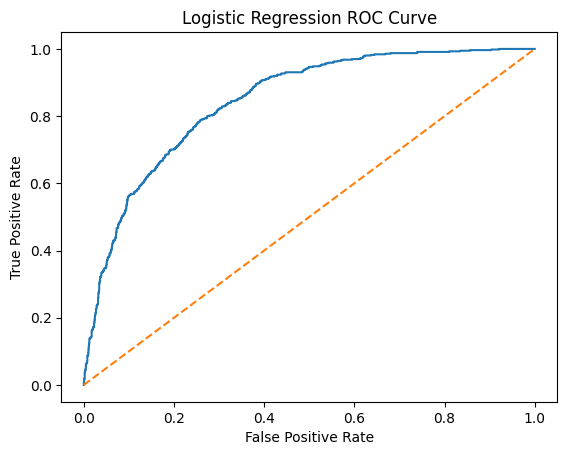

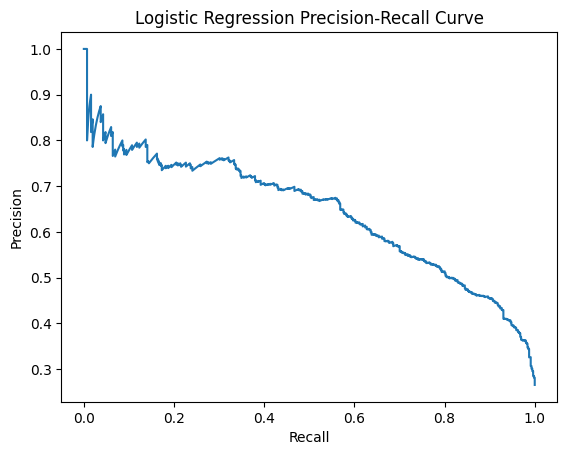

Chosen threshold (approx 0.75 recall): 0.5642387538036743
Classification Report at chosen threshold
              precision    recall  f1-score   support

       False       0.90      0.77      0.83      1552
        True       0.54      0.75      0.63       561

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.76      0.77      2113



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Train logistic regression with better settings
log_reg = LogisticRegression(
    solver="liblinear",
    max_iter=5000,
    class_weight="balanced"
)
log_reg.fit(X_train, y_train)

# Predictions and probabilities
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="--")
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Precision-Recall curve
prec, rec, thr = precision_recall_curve(y_test, y_proba_lr)
plt.plot(rec, prec)
plt.title("Logistic Regression Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# Pick threshold around 0.75 recall
target_recall = 0.75
idx = np.argmin(np.abs(rec - target_recall))
chosen_thr_lr = thr[max(idx-1,0)]
print("Chosen threshold (approx 0.75 recall):", chosen_thr_lr)

y_pred_lr_thr = (y_proba_lr >= chosen_thr_lr).astype(int)
print("Classification Report at chosen threshold")
print(classification_report(y_test, y_pred_lr_thr))


Random Forest Results
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1552
        True       0.63      0.48      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113

ROC AUC: 0.8244706387709724
Confusion matrix:
 [[1395  157]
 [ 293  268]]


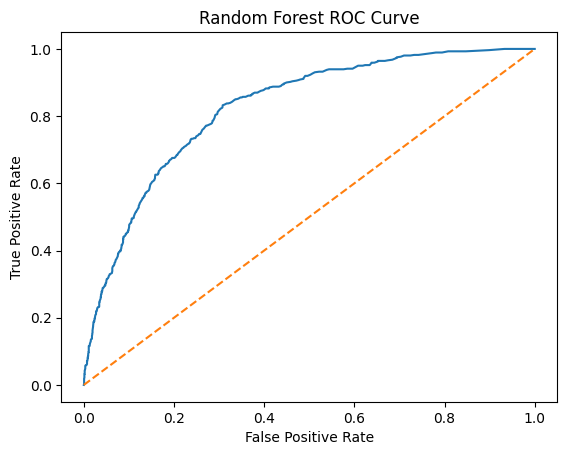

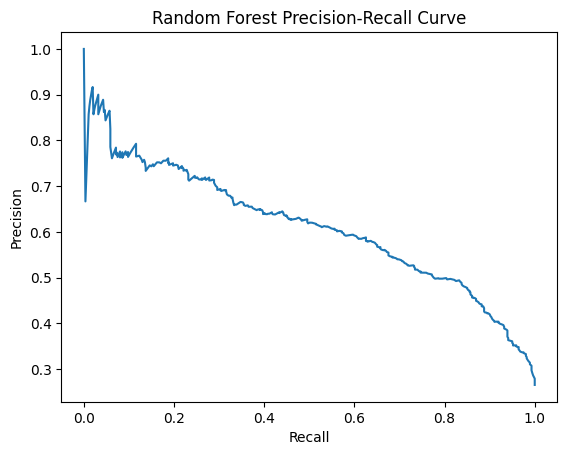

Chosen threshold (approx 0.75 recall): 0.265
Classification Report at chosen threshold
              precision    recall  f1-score   support

       False       0.89      0.74      0.81      1552
        True       0.51      0.75      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.76      2113



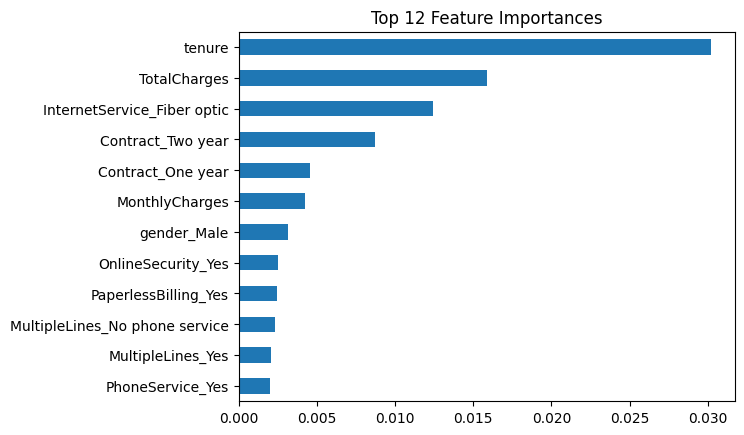

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

# Predictions and probabilities
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="--")
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Precision-Recall curve
prec, rec, thr = precision_recall_curve(y_test, y_proba_rf)
plt.plot(rec, prec)
plt.title("Random Forest Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# Pick threshold around 0.75 recall
target_recall = 0.75
idx = np.argmin(np.abs(rec - target_recall))
chosen_thr_rf = thr[max(idx-1,0)]
print("Chosen threshold (approx 0.75 recall):", chosen_thr_rf)

y_pred_rf_thr = (y_proba_rf >= chosen_thr_rf).astype(int)
print("Classification Report at chosen threshold")
print(classification_report(y_test, y_pred_rf_thr))

# Feature Importance
perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
feat_importances = (pd.Series(perm.importances_mean, index=X.columns)
                    .sort_values(ascending=False)
                    .head(12))
feat_importances.plot(kind="barh")
plt.title("Top 12 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


# 7. BUSINESS INSIGHTS

- **Contract Type:** Month-to-month customers show the highest churn rates.  
- **Tenure:** Customers with tenure under 12 months are most at risk.  
- **Charges:** Higher monthly charges increase churn probability.  
- **Drivers Identified:** Contract type, tenure, monthly charges, and fiber optic internet.  

**Recommendations:**  
- Promote discounts for long-term contracts.  
- Target retention campaigns at customers in their first year.  
- Offer loyalty rewards for high-paying customers.  


# 8. CONCLUSION

This analysis built two models (Logistic Regression and Random Forest) to predict customer churn.  
The Random Forest achieved higher ROC-AUC and offered clearer feature importance.  
At a threshold tuned for ~0.75 recall, the model can correctly flag most churners while keeping outreach manageable.  

**Next Steps:**  
- Hyperparameter tuning to further improve performance.  
- Uplift modeling to focus only on customers who can be retained.  
- Deployment of the model into a real-time customer dashboard.  
